# **A ML Pipeline aproach for diferent scenarios.**


In this knowledge example, a data set on **loans** and their characteristics will be used, as well as one related to **health prescriptions** and modified in advance for academic purposes.

The insights hidden inside the available datasets will be analyzed through seven important topics: data preprocessing, data visualization, supervised learning, unsupervised learning, model ensembling, model selection, and model evaluation. 

Following the next Machine Learning pipeline schema.

<img src='MLPipeline.jpg'/>

# **Step 1 : Pre-processing and Visualization**

In this exercise, we'll practice the first pre-processing step by finding and exploring ways to handle missing values and wrong labels using pandas and numpy packages.

This is where we are in the pipeline:

<img src='pipeline-01.png'/>

We load the Loan data and print out the features along with the number of missing values.

In [1]:
# Import modules
import numpy as np
import pandas as pd


In [2]:
loan_data  = pd.read_csv('LoansTrainingSetReduced.csv')

In [3]:
# Print missing values
loan_data.isna().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48506
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      192
Tax Liens                           8
dtype: int64

We drop the rows with missing values and print the percentage of rows remaining.

In [4]:
# Drop rows with missing values
dropNArows = loan_data.dropna(axis=0)

# Print percentage of rows remaining
dropNArows.shape[0]/loan_data.shape[0] * 100

34.347092565515695

Likewise, we drop the columns with missing values and print the percentage of columns remaining.

In [5]:
# Drop columns with missing values
dropNAcols = loan_data.dropna(axis=1)

# Print percentage of columns remaining
dropNAcols.shape[1]/loan_data.shape[1] * 100

70.58823529411765

We impute loan_data's missing values with 0 into loan_data_filled and next compare 'Credit Score' using .describe() before imputation using loan_data and after using loan_data_filled.


In [6]:
# Fill missing values with zero
loan_data_filled = loan_data.fillna(0)

# Examine 'Credit Score' before
loan_data['Credit Score'].describe()


count    67572.000000
mean       721.601951
std         27.427709
min        585.000000
25%        710.000000
50%        730.000000
75%        741.000000
max        751.000000
Name: Credit Score, dtype: float64

In [7]:
# Examine 'Credit Score' after
loan_data_filled['Credit Score'].describe()

count    88910.000000
mean       548.420729
std        309.109970
min          0.000000
25%        632.000000
50%        719.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64

The important thing to notice here is that removing rows or columns in this case reduces the dataset way too much to be useful. In the next exercises, we'll examine other imputing techniques.

### Simple imputation

As we saw in the last exercise, deleting data can reduce your dataset by too much. A more dynamic way of handling missing values is by imputing them. There are a variety of ways of doing this in python, but in this exercise you will be using the SimpleImputer() function from the sklearn.impute module on loan_data.

This is where we are in the pipeline:

<img src='pipeline-02.png'/>


In [8]:
# Import imputer module
from sklearn.impute import SimpleImputer

We subset loan_data's numeric columns and assign them to numeric_cols.

In [9]:
# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

We instantiate a simple imputation object with a mean imputation strategy. Next we Fit and transform the data.


In [10]:
# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

We convert the returned array back to a DataFrame.

In [11]:
# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

We print the imputed DataFrame's information using the .info() function to check for missing values.

In [12]:
# Check the DataFrame's info
loans_imp_meanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

We can also use the exercise code and just set the strategy keyword to 'median' to impute the median or 'most_frequent' to impute the mode, etc. 

### Iterative imputation

In the previous exercise, we derived mean imputations for missing values of loan_data. In this exercise, we'll practice a machine-learning based approach by imputing missing values as a function of remaining features using IterativeImputer() from sklearn.impute. This is a multivariate imputer that estimates each feature from all of the others  in a 'round-robin' fashion. 

First, we load the libraries needed and subset loan_data's numeric columns and assign them to numeric_cols.

In [13]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [14]:
# Subset numeric features: numeric_cols
numeric_cols_2 = loan_data.select_dtypes(include=[np.number])

We instantiate an iterative imputation object with 3 iterations. Next we Fit and transform the data.


In [15]:
# Iteratively impute
imp_iter = IterativeImputer(max_iter=3, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols_2)

We convert the return array object back to DataFrame.

In [16]:
# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols_2.columns)

Fianlly, we print the imputed DataFrame's information using the .info() function to check for missing values.

In [17]:
# Check the DataFrame's info
loans_imp_iterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

### Train/test distributions
In this exercise, we'll use functions from sklearn.model_selection as well as seaborn and matplotlib.pyplot to split loan_data into a training set and a test set, as well as visualize their distributions to spot any discrepancies.

Our pipeline now includes Train/Test split:

<img src='pipeline-03.png'/>

In [18]:
#import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

We subset loan_data to only the Credit Score and Annual Income features, and the target variable Loan Status in that order.
Also we create an 80/20 split of loan_data and assign it to loan_data_subset.
Finally we create pairplots of trainingSet and testSet (in that order) setting the hue argument to the target variable Loan Status.


<Figure size 432x288 with 0 Axes>

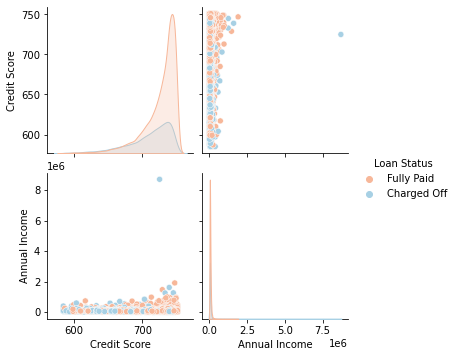

<Figure size 432x288 with 0 Axes>

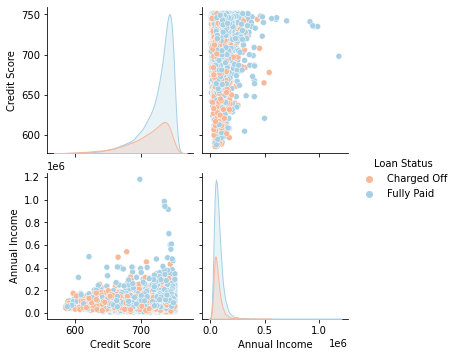

In [19]:
# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Annual Income','Loan Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset, test_size=0.2, random_state=123)

# Examine pairplots
plt.figure()
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

plt.figure()
sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()

We can notice that trainingSet and testSet have different distributions when conditioned on the Loan Status target variable.

### Log and power transformations

In the last exercise, we compared the distributions of a training set and test set of loan_data.  In this exercise, we will be using the log and power transformation from the scipy.stats module on the Years of Credit History feature of loan_data along with the displot() function from seaborn, which plots both its distribution and kernel density estimation.

Here is where we are in the pipeline:

<img src='pipeline-03.png'/>

First, we load the libraries needed and subset loan_data for 'Years of Credit History' and plot its distribution and kernel density estimation (kde) using distplot().

<Figure size 432x288 with 0 Axes>

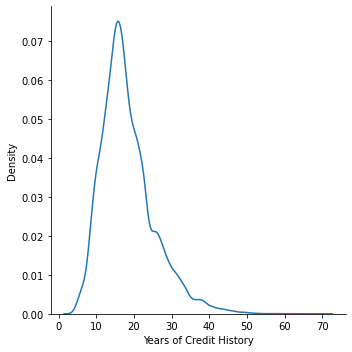

In [20]:
# Librarie needed
from scipy import stats
from scipy.stats import boxcox

# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()
sns.displot(cr_yrs,kind="kde")
plt.show()

Now we apply a log transformation using the Box-Cox transformation to cr_yrs and plot its distribution and kde.

<Figure size 432x288 with 0 Axes>

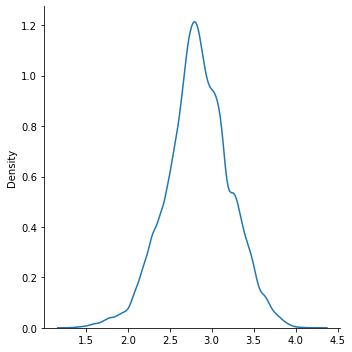

In [21]:
# Box-Cox transformation
cr_yrs_log = boxcox(cr_yrs, lmbda=0.0)

# Histogram and kernel density estimate
plt.figure()
sns.displot(cr_yrs_log, kind="kde")
plt.show()

Finally we transform 'Years of Credit History' using the Box-Cox square-root argument and plot its distribution and kde.

<Figure size 432x288 with 0 Axes>

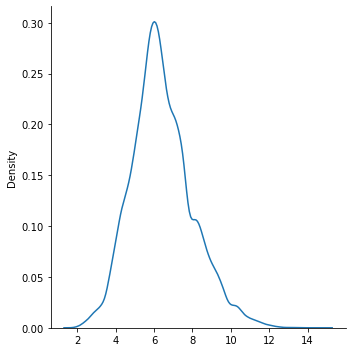

In [22]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Square root transform
cr_yrs_sqrt = boxcox(cr_yrs, lmbda=0.5)

# Histogram and kernel density estimate
plt.figure()
sns.displot(cr_yrs_sqrt, kind="kde")
plt.show()

All of the above techniques help us to use explicit features to achieve a normal distribution in the data.

### Outlier detection
A very important aspect of preprocessing our data correctly is outlier detection. An easy way to detect outliers is by visualizing them graphically. There's a variety of packages that let us visualize outliers, but in this exercise, we will be using seaborn to plot univariate and multivariate boxplots of selected columns of loan_data.

We are in the same step of the pipeline:

<img src='pipeline-03.png'/>

First, we create a univariate boxplot using the feature Annual Income from loan_data. Then we create a multivariate boxplot conditioned on Loan Status using the feature Annual Income from loan_data.


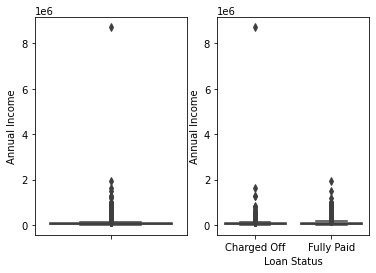

In [23]:
# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Annual Income'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Annual Income', data=loan_data, ax=ax[1])
plt.show()

Now to see the difference, we create a univariate boxplot using the feature Monthly Debt from loan_data. Likewise a multivariate boxplot conditioned on Loan Status using the feature Monthly Debt from loan_data.


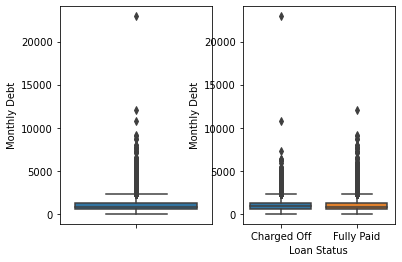

In [24]:
# Multivariate boxplot
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Monthly Debt'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Monthly Debt', data=loan_data, ax=ax[1])
plt.show()

Finally, we create a univariate and multivariate boxplot using the feature Years of Credit History from loan_data.


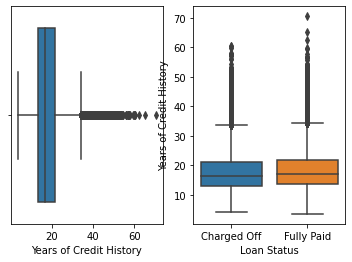

In [25]:
# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(x=loan_data['Years of Credit History'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Years of Credit History', data=loan_data, ax=ax[1])
plt.show()

Through the information present in the plots, we can come to the conclusion that loan_data has outliers that need to be addressed.

### Handling outliers

In the last exercise, we learned how visualizing outliers. Another convenient way for handling outliers is by calculating the Z-score which gives a threshold for outliers approximately +/-3 standard deviations away from the mean.

In the next exercise, we will use the scipy.stats module to calculate the Z-score using the stats.zscore() function and the mstats.winsorize() function to replace outliers using a technique called Winsorizing. 

We have to recall that points above and/or below 1.5 times the IQR should be suspected as possible outliers.

First we load the libraries needed.

In [26]:
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

First we create an index of rows to keep for absolute z-scores less than 3 on the numeric columns and use it to index and concatenate subsets.

In [27]:
# Print: before dropping
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())

# Create index of rows to keep
idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)

categoric_cols = loan_data.select_dtypes(include=[object])

# Concatenate numeric and categoric subsets
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)

# Print: after dropping
print(ld_out_drop.mean())
print(ld_out_drop.median())
print(ld_out_drop.max())

Current Loan Amount             1.433878e+07
Credit Score                    7.216020e+02
Years in current job            5.721263e+00
Annual Income                   7.234575e+04
Monthly Debt                    9.631021e+02
Years of Credit History         1.831531e+01
Months since last delinquent    3.508029e+01
Number of Open Accounts         1.111035e+01
Number of Credit Problems       1.604769e-01
Current Credit Balance          1.543593e+04
Maximum Open Credit             3.356812e+04
Bankruptcies                    1.126716e-01
Tax Liens                       2.822209e-02
dtype: float64
Current Loan Amount             14355.000
Credit Score                      730.000
Years in current job                6.000
Annual Income                   61494.000
Monthly Debt                      843.925
Years of Credit History            17.000
Months since last delinquent       32.000
Number of Open Accounts            10.000
Number of Credit Problems           0.000
Current Credit Balance

Now we Winsorize 'Monthly Debt' with 5% upper and lower limits and print the mean, median and max before and after.

In [28]:
# Print: before winsorize
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Winsorize numeric columns
debt_win = winsorize(loan_data['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())

963.1020592734293
843.925
22939.12
Monthly Debt    935.371257
dtype: float64
Monthly Debt    843.925
dtype: float64
Monthly Debt    2115.52
dtype: float64


Finally we find the median of the values of Monthly Debt that are lower than 2120 and replace outliers with it.

In [29]:
# Print: before replace with median
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Find median
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data['Monthly Debt'] = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])

print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

963.1020592734293
843.925
22939.12
866.8290722078564
811.51
2119.72


We ca notice how the median didn't change when we dropped or winsorized, but it did when we replaced outliers with the median in the last step. This is because only the right tail outliers got replaced causing the median to shift!

### Z-score standardization

In the last exercise, we calculated the Z-score to address outliers. In the next exercise we'll use a function from sklearn.preprocessing to standardize the numeric feature columns in the loan_data dataset. We have to recall that this scales the data so that it has a mean of 0 and standard deviation of 1.

We are in this step of the pipeline:

<img src='pipeline-04.png'/>

We load the librarie needed.

In [30]:
from sklearn.preprocessing import StandardScaler

First, we create a subset of the numeric and categorical columns in loan_data.

In [31]:
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

Now we instantiate a standard scaler object and assign it to scaler.

In [32]:
# Instantiate
scaler = StandardScaler()

Now we Fit and transform the relevant columns with a call to the appropriate method, then convert the returned object back to a DataFrame.

In [33]:
# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

Finally we concatenate the categorical and scaled numeric columns.

In [34]:
# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([categoric_cols, numeric_cols_scaledDF], axis=1)
final_DF.head()

,Loan Status,Term,Home Ownership,Purpose,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,Short Term,Rent,DebtConsolidation,-0.408982,0.233271,-1.312259,-0.440413,-0.195819,-0.044731,-1.139583,0.178701,-0.338742,-0.441228,-0.097522,-0.328203,-0.109587
1,Charged Off,Long Term,Mortgage,DebtConsolidation,-0.408617,0.415570,1.189261,0.149986,0.055307,1.189463,NaN,0.580434,-0.338742,1.031104,0.168967,-0.328203,-0.109587
2,Charged Off,Short Term,Mortgage,HomeImprovements,-0.408871,0.087432,0.911314,-0.204037,0.825827,-0.229151,-0.139960,-0.022165,1.772105,-0.211660,-0.071377,2.584717,-0.109587
3,Charged Off,Short Term,Rent,DebtConsolidation,-0.408997,0.670788,-0.756366,-0.654119,0.271730,-1.179622,NaN,1.986499,-0.338742,-0.428664,0.037928,-0.328203,-0.109587
4,Charged Off,Long Term,Mortgage,HomeImprovements,-0.409052,-1.298038,1.189261,-0.434244,-0.795018,-0.229151,-0.458022,0.379568,1.772105,0.075136,-0.053344,2.584717,-0.109587


We can see that the data is already standardized, we could use another method with MinMaxScaler from sklearn.preprocessing for scaling the data so that it falls between 0 and 1.

# **Step 2: Supervised Machine Learning Techniques**

In the second step of this practice, we'll practice different aspects of supervised machine learning techniques, such as selecting the optimal feature subset, regularization to avoid model overfitting, feature engineering, and ensemble models to address the so-called bias-variance trade-off.

### Filter and wrapper methods

Reducing the dimensionality of a dataset are highly common topics in machine learning. Here we'll practice a filter method on the diabetes DataFrame followed by 2 different styles of wrapper methods that include cross-validation. We will be using pandas, matplotlib.pyplot and seaborn to visualize correlations, process our data and apply feature selection techniques to our dataset.

Notice we've added a Cross-validate step to our pipeline schema.

<img src='pipeline-05.png'/>

The feature matrix with the dropped target variable column (progression) is loaded as X, while the target variable is loaded as y.

In [35]:
# Load the data
diabetes = pd.read_csv('diabetes.csv')


In [36]:
X = diabetes.drop('progression', axis=1)

In [37]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [38]:
y = diabetes['progression']

In [39]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: progression, Length: 442, dtype: float64

Now we create correlation matrix with diabetes and a heatmap, then subset the features which have greater than 50% correlation.

                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

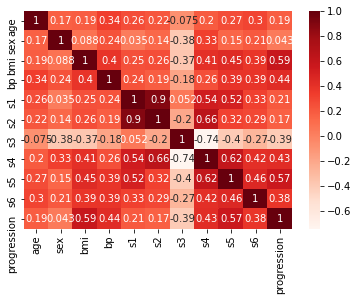

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64


In [40]:
# Create correlation matrix and print it
cor = diabetes.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features
best_features = cor_target[cor_target > 0.5]
print(best_features)

We instantiate a linear kernel SVR estimator and a feature selector with 5 cross-validations, then we fit to features and target.

In [41]:
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


Now we drop the unimportant column found in step 2 from X and instantiate a LarsCV object and fit it to our data.

In [42]:
# Import modules
from sklearn.linear_model import LarsCV

# Drop feature suggested not important in step 2
X = X.drop('sex', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

0.4982900996498095
0.052268622851592485


While filter and wrapper methods work pretty well for feature selection, tree-based selection methods can be even better.

### Feature selection through feature importance

In the last exercise, we practiced how filter and wrapper methods could be of use when selecting features in machine learning. In this exercise, we'll practice feature selection methods using the built-in feature importance in tree-based machine learning algorithms on the diabetes DataFrame. 

To remember: Feature selection is considered a pre-processing step.

We continue in the same step of the pipeline:

<img src='pipeline-05.png'/>

First we import the correct function to instantiate a Random Forest regression model. Next we Fit the model and print feature importance.


In [43]:
# Import
from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
                               n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.         0.39961579 0.03085607 0.         0.00128948 0.00700339
 0.00417891 0.53899467 0.01806168]


Likewise we import the correct function to instantiate and Extra Tree regression model ad Fit the model and print feature importance.


In [44]:
# Import
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X, y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.06193198 0.26365673 0.11724796 0.05139544 0.05425186 0.06655723
 0.0747062  0.22600648 0.08424612]


We can see that both the Random Forest and Extra Trees ultimately methods have similar results, the output from the Random Forest are a bit more clear. Either way, one of the simplest ways to have an algorithm select features for our before training our machine learning models are tree-based methods such as these.

## Regression Regularization 

### Lasso regularization

In this exercise, we will build on your knowledge of feature selection and perform all the steps in the machine learning pipeline by trying out Lasso Regularization.

We're now performing all of the steps in the machine learning pipeline - importing modules, preprocessing steps, instantiating estimators, train/test split, cross validating, tuning hyperparameters, then fitting, predicting and evaluating. 

First, we import the functions needed for regular and cross-validated Lasso Regression, as well as mean squared error.

In [45]:
# Import modules
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

Now we Split our data into training and testing data with 30% test size.

In [46]:
# Train/test split
train_X, test_x, train_y, test_y = train_test_split(X, y, random_state=123, test_size=0.30)

We instantiate a cross-validated lasso regression model setting 10-fold cross-validation and 10000 iterations, then fit it to our training data.

In [47]:
# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(train_X, train_y) 

LassoCV(cv=10, max_iter=10000)

Finally we instantiate a lasso estimator passing the best alpha value from lasso_cv and Fit the model and print the mean squared error of our predictions.


In [48]:
# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(train_X, train_y)
mean_squared_error(y_true=test_y, y_pred=lasso.predict(test_x))

2977.432094562674

The MSE of 2977, which is the average error using cross-validated lasso regression. Let's see if it can be improved or not by practicing cross-validated ridge regression.

### Ridge regularization

In the last exercise we practiced performing lasso regularization. Lasso uses the L1 norm corresponding to the penalty parameter and the absolute value of the coefficients. Ridge regression performs L2 regularization, also known as L2-norm, which adds a penalty term to ordinary least squares using the penalty parameter and the sum of the squared coefficients.

For this exercise, we'll practice regularization with Ridge on the diabetes DataFrame. 

In this stage, like the previous one, we use all the steps in the pipeline schema:

<img src='pipeline-06.png'/>

We import the functions needed for regular and cross-validated Ridge Regression, as well as mean squared error.

In [49]:
# Import modules
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

We Split our data into training and testing data with 30% test size.

In [50]:
# Train/test split
train_X1, test_x1, train_y1, test_y1 = train_test_split(X, y, random_state=123, test_size=0.30)

We instantiate a cross-validated ridge regression model object setting alphas to a list of 13 log scale values from -6 to 6 using np.logspace(). Next we Fit it to our training data.


In [51]:
# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(train_X1, train_y1)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

Finally we instantiate a ridge estimator passing the best alpha value from ridge_cv and Fit the model and print the mean squared error of our predictions.


In [52]:
# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(train_X1, train_y1)
print(mean_squared_error(y_true=test_y1, y_pred=ridge.predict(test_x1)))

3037.3833325134415


The MSE of 3037 of the ridge model performs worse than the previous one, we can test other models like Elasticnet if necessary.

### ElasticNet Regularization

ElasticNet is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. In this exercise we will check if this method improves the results of the previous models.

We import the functions needed for regular and cross-validated ElasticNet Models

In [53]:
# Import modules
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error

We Split our data into training and testing data with 30% test size.

In [54]:
# Train/test split
train_X2, test_x2, train_y2, test_y2 = train_test_split(X, y, random_state=123, test_size=0.30)

We instantiate a cross-validated ElasticNet regression model object setting alphas to a list of 13 log scale values from -6 to 6 using np.logspace(). Next we Fit it to our training data.

In [55]:
# Instantiate cross-validated ridge, fit
elasticnet_cv = ElasticNetCV(alphas=np.logspace(-6, 6, 13), cv=10, max_iter=10000)
elasticnet_cv.fit(train_X2, train_y2)

ElasticNetCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
             cv=10, max_iter=10000)

Finally we instantiate a ElasticNet estimator passing the best alpha value from elasticnet_cv and Fit the model and print the mean squared error of our predictions.

In [56]:
# Instantiate ridge, fit, predict and print MSE
elasticnet = ElasticNet(alpha = elasticnet_cv.alpha_)
elasticnet.fit(train_X2, train_y2)
mean_squared_error(y_true=test_y2, y_pred=elasticnet.predict(test_x2))

3072.738343576078

We can check that the MSE of the model performs worse than the previous ones, Lasso Model presents the best value at the end.

### Logistic regression baseline classifier

In this exercise, we'll engineer a new feature on the loan_data dataset from step 1, compare the accuracy score of Logistic Regression models on the dataset before and after feature engineering by comparing test labels with the predicted values of the target variable Loan Status. 

Feature engineering is considered a pre-processing step before modeling: 

<img src='pipeline-07.png'/>

As usual, we load the libraries needed.

In [57]:
# load the packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

First, we Fit and predict a Logistic Regression on loan_data with the target variable Loan Status as y and evaluate the trained model's accuracy score.

In [58]:
# Create X matrix and y array
X = loan_data.drop(["Loan Status"], axis=1)
y = loan_data["Loan Status"]

In [59]:
X.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,12232,Short Term,728.0,1.0,Rent,46643.0,DebtConsolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,25014,Long Term,733.0,10.0,Mortgage,81099.0,DebtConsolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,16117,Short Term,724.0,9.0,Mortgage,60438.0,HomeImprovements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,11716,Short Term,740.0,3.0,Rent,34171.0,DebtConsolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,9789,Long Term,686.0,10.0,Mortgage,47003.0,HomeImprovements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [60]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=96)

In [61]:
# Instantiate
logistic = LogisticRegression()

In [ ]:
# Fit
logistic.fit(X_train, y_train)

In [ ]:
# Predict and print accuracy
accuracy_score(y_true=y_test, y_pred=logistic.predict(X_test))

0.714825822

Now we convert Annual Income to monthly, and derive the ratio of Monthly Debt to monthly_income and store it in dti_ratio.

In [63]:
# Convert income: monthly_income
monthly_income = loan_data["Annual Income"]/12

# Make engineered feature, remove features used
loan_data["dti_ratio"] = loan_data["Monthly Debt"]/monthly_income * 100
loan_data = loan_data.drop(["Monthly Debt","Annual Income"], axis=1)

Also we convert the target variable to numerical values and replace categorical features with dummy values.

In [64]:
# Replace target variable levels
loan_data["dti_ratio"] = loan_data["dti_ratio"].replace({'Fully Paid': 0, 
                                            'Charged Off': 1})

# One-hot encode categorical variables
loan_data = pd.get_dummies(data=loan_data)

# Print
loan_data.head()

,Current Loan Amount,Credit Score,Years in current job,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_EducationalExpenses,Purpose_HomeImprovements,Purpose_HomePurchase,Purpose_MajorPurchase,Purpose_MedicalBills,Purpose_Moving,Purpose_Other,Purpose_RenewableEnergyPurchase,Purpose_Vacation,Purpose_Wedding
0,12232,728.0,1.0,18.0,10.0,12,0,6762,7946,0.0,...,0,0,0,0,0,0,0,0,0,0
1,25014,733.0,10.0,26.7,NaN,14,0,35706,77961,0.0,...,0,0,0,0,0,0,0,0,0,0
2,16117,724.0,9.0,16.7,32.0,11,1,11275,14815,1.0,...,0,1,0,0,0,0,0,0,0,0
3,11716,740.0,3.0,10.0,NaN,21,0,7009,43533,0.0,...,0,0,0,0,0,0,0,0,0,0
4,9789,686.0,10.0,16.7,25.0,13,1,16913,19553,1.0,...,0,1,0,0,0,0,0,0,0,0


Finally we Fit and predict a Logistic Regression on loans_dti and evaluate the trained model's accuracy score.

In [ ]:
# Create X matrix and y array
X = loan_data.drop("Loan Status", axis=1)
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic_dti = LogisticRegression()

# Fit
logistic_dti.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic_dti.predict(X_test)))

 0.7209333333333333

We've just seen how the accuracy went from a baseline LogisticRegression model with 71% accuracy to 72%.

### Ensemble Methods 

### Bootstrap aggregation (bagging)

In this exercise, we will start off by applying a bagging classifier which uses a sampling technique, with replacement, to maintain randomness and reduce overfitting.

We use all relevant packages like pandas as pd, train_test_split from sklearn.model_selection, accuracy_score from sklearn.metrics, LogisticRegression from sklearn.linear_model

As usual we load the libraries needed.

In [66]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

We instantiate a bagging classifier by calling the appropriate function and set the appropriate argument for 50 estimators.

In [67]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

Fit the model object to the data.

In [ ]:
# Fit
bagged_model.fit(X_train, y_train)

In [ ]:
# Predict
bagged_pred = bagged_model.predict(X_test)

In [ ]:
# Print accuracy score
accuracy_score(y_test, bagged_pred)

 0.70416

The purpose of the Bagged models is to decrease model variance.

### Boosting

Here, we'll practice Boosting which uses all data to train each learner, but instances that were misclassified by the previous learners are given more weight so that subsequent learners give more focus to them during training. This results in a model with decreased bias.

We instantiate an AdaBoost boosting classifier and set the appropriate argument to generate 50 estimators.

In [69]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

We Fit the data, create predictions using the test set and Evaluate the model fit.

In [ ]:
# Fit
boosted_model_fit = boosted_model.fit(X_train, y_train)

# Predict
boosted_pred = boosted_model_fit.predict(X_test)

# Print model accuracy
accuracy_score(y_test, boosted_pred)

 0.72408

The boosted model did slightly better than the bagged model, but let's see what happens when we stack them. Onward!

### XG Boost

In this exercise, we'll practice yet another boosting technique. Dubbed the new queen of Machine Learning, XGBoost is an optimized distributed gradient boosting package that is "taking over the world!". 

The argument learning_rate=0.1 specifies the size of the step to take in each iteration while searching for the global minimum and max_depth controls the size (depth) of the decision trees, in this example 3.

We install and import the library needed then instanciate:

In [71]:
import xgboost as xgb

In [72]:
from xgboost import XGBClassifier

In [73]:
# Instantiate
xgb = XGBClassifier(n_estimators=10, random_state=123, learning_rate=0.1, max_depth=3)


We fit, create predictions using the test data and Evaluate the model fit.

In [ ]:
# Fit
xgb = xgb.fit(X_train, y_train)

# Predict
xgb_pred = xgb.predict(X_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(y_test, xgb_pred))

Final prediction score: [0.71960000]

The AdaBoost Classifier did slightly better than XGBoost with this dataset. But that's not always the case, so it's a good practice to try other models! 

# **Step 3 : Unsupervised Learning**

In the third step of this practice, we'll use unsupervised learning to apply feature extraction and visualization techniques for dimensionality reduction and clustering methods to select not only an appropriate clustering algorithm but optimal cluster number for a dataset.

### Principal component analysis (PCA)

In the last 2 steps, we saw various instances about how to reduce the dimensionality of our datasets including regularization and feature selection.

It is important to be able to explain different aspects of reducing dimensionality, because large datasets take a long time to compute, and noise in our data can bias our results.

Principal component analysis it's an effective way of reducing the size of the data by creating new features that preserve the most useful information on a dataset while at the same time removing multicollinearity.

Here we are in the pipeline schema:

<img src='pipeline-02.png'/>

As usual, we load the libraries needed and use again the **Diabetes dataset**.

In [75]:
from sklearn.decomposition import PCA

We create a feature matrix X and target array y with progression from the diabetes dataset.

In [76]:
# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

 Then we instantiate a principal component analysis object to perform linear dimensionality reduction that returns 3 components.

In [77]:
# PCA
pca = PCA(n_components=3)

Fit and transform the feature matrix.

In [78]:
# Fit and transform
principalComponents = pca.fit_transform(X)

Print the ratio of variance explained.

In [79]:
# Print ratio of variance explained
pca.explained_variance_ratio_

array([0.40242142, 0.14923182, 0.12059623])

The first PC explains 40% of the variance with all 3 around 67%. Let's see if singular value decomposition gives different results!

### Singular value decomposition (SVD)

In this exercise, we'll practice SVD on the **diabetes dataset**. This particular transformer can work with sparse matrices efficiently, as opposed to PCA, and performs linear dimensionality reductions by way of truncated singular value decomposition.

Singular value decomposition takes the original data matrix, decomposes it into three matrices and uses them to calculate and return singular values.

We are in the same place in the pipeline with a different technique:

<img src='pipeline-02.png'/>

Now we import the relevant module to perform SVD and create a feature matrix X and target array y with progression from the diabetes dataset.


In [80]:
# Import module
from sklearn.decomposition import TruncatedSVD

# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

We instantiate a singular value decomposition object to perform dimensionality reduction that returns 3 components.

In [81]:
# SVD
svd = TruncatedSVD(n_components = 3)

Fit and transform the feature matrix.

In [82]:
# Fit and transform
principalComponents = svd.fit_transform(X)

Print the ratio of variance explained.

In [83]:
# Print ratio of variance explained
svd.explained_variance_ratio_

array([0.40242142, 0.14923182, 0.12059623])

It looks like the both models perform exactly the same with this dataset! So trying both is a good idea. 

##  Dimensionality reduction: visualization techniques

### Visualization separation of classes with PCA I

In this exercise, we will do just that by plotting the first 2 principal components of loan_data in order to visualize the class separation between both components on whether the loan status has been fully paid or charged off.


Now we assign the target variable values to the list targets. Pass the lists just created to the zip() function inside the for loop. Pass the instances where Loan Status is equal to target to indicesToKeep.

Now we pass the appropriate object as the rows argument to loan_data_PCA.loc[] which keeps the data points on the x-axis equal to the target.
Pass the appropriate object as the column argument to loan_data_PCA.loc[]which keeps the data points on the y-axis equal to PC2.

Fianlly we add a legend to the plot to label the different classes.

In [ ]:
targets = [0, 1]
colors = ['r', 'b']

# For loop to create plot
for target, color in zip(targets,colors):
    indicesToKeep = loan_data_PCA['Loan Status'] == target
    ax.scatter(loan_data_PCA.loc[indicesToKeep, 'principal component 1']
               , loan_data_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

# Legend    
ax.legend(targets)
ax.grid()
plt.show()

<img src='pca-01.jpg'/>


It looks like there's not great separation between the classes Fully Paid and Charged Off.

### Visualization PCs with a scree plot

In this exercise we'll create a scree plot and a cumulative explained variance ratio plot of the principal components using PCA on loan_data. This will help inform the optimal number of PCs for training a more accurate ML model going forward. 

Since PCA is an unsupervised method, that means principal component analysis is performed on the X matrix having removed the target variable Loan Status from the dataset. 

Not setting n_components returns all the principal components from the trained model.

First, we create a data matrix X, removing the target variable then instantiate, fit and transform a PCA object that returns 10 PCs.


In [84]:
# Instantiate
pca = PCA(n_components=10)

# Fit and transform
principalComponents = pca.fit_transform(X)

Now we create a DataFrame mapping Variance Explained to the explained variance ratio. Create also a scree plot from pca_df setting your PCs on the x-axis and explained variance on the y-axis.


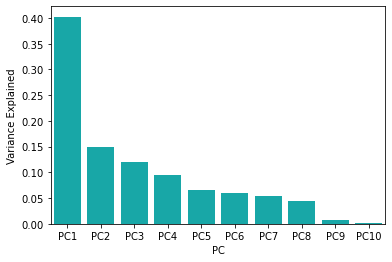

In [85]:
# List principal components names
principal_components = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

# Create a DataFrame
pca_df = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_,
             'PC':principal_components})

# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.show()

We instantiate, fit and transform a PCA object not setting n_components and finally print the variance explained ratio.


In [86]:
# Instantiate, fit and transform
pca2 = PCA()
principalComponents2 = pca2.fit_transform(X)

# Assign variance explained
var = pca2.explained_variance_ratio_

var

array([0.40242142, 0.14923182, 0.12059623, 0.09554764, 0.06621856,
       0.06027192, 0.05365605, 0.04336832, 0.00783199, 0.00085605])

We assign the cumulative sum of the explained ratios from the previous step to cumulative_var and Plot the results.


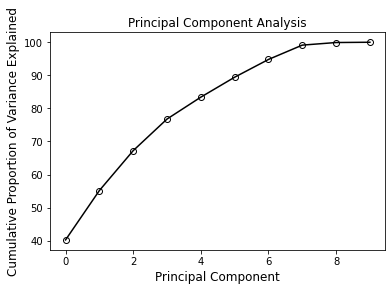

In [87]:
# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

The first 10 principal components explain 90% of the variance in loan_data. That's pretty good considering the original dataset has more than 30 features!

## Clustering analysis

### K-means clustering

In this exercise we'll practice K-means clustering. Using the .inertia_ attribute to compare models with different numbers of clusters, k, we'll then also use this information to assess cluster number in the next exercise.

We have to recall that the target variable in the diabetes dataset is progression.

Where we are at this moment in the pipeline:

<img src='pipeline-02.png'/>

We import the modules, Create a feature matrix X by dropping the target variable progression and fit the data to the instantiated k-means object.

In [88]:
# Import module
from sklearn.cluster import KMeans

# Create feature matrix
X = diabetes.drop("progression", axis=1)

# Instantiate
kmeans = KMeans(n_clusters=2, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 2 clusters is", kmeans.inertia_)

Sum of squared distances for 2 clusters is 7.187000018583657


Now we instantiate a 5 cluster k-means and print its inertia.

In [89]:
# Instantiate
kmeans = KMeans(n_clusters=5, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 5 clusters is", kmeans.inertia_)

Sum of squared distances for 5 clusters is 5.554112564296043


Likewise we Fit the feature matrix to a 10-cluster k-means and print its inertia.

In [90]:
# Instantiate
kmeans = KMeans(n_clusters=10, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 10 clusters is", kmeans.inertia_)

Sum of squared distances for 10 clusters is 4.364631179118139


Finally, we Fit the feature matrix to a 20-cluster k-means and print its inertia.

In [91]:
# Instantiate
kmeans = KMeans(n_clusters=20, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 20 clusters is", kmeans.inertia_)

Sum of squared distances for 20 clusters is 3.516404544955705


Which value of k returned the lowest inertia? We'll compare it to the number selected by hierarchical clustering in the next exercise.

### Hierarchical agglomerative clustering

In the last exercise, you saw how the number of clusters while performing K-means clustering could impact our results allowing you to discuss K-means.

In Python, we could derive the optimal number of clusters for this technique both visually and mathematically. We will use the scipy and sklearn modules to do both.

We have to recall that selecting the optimal number of clusters from a dendrogram depends on both the linkage criteria and distance threshold.

Here, we'll create a dendrogram with the X matrix from diabetes, then extend an imaginary line at length 1.50, counting the number of vertical lines crossed to represent the optimal number of clusters for your hierarchical clustering algorithm going forward.


We import the relevant packages to create a dendrogram and perform agglomerative hierarchical clustering.

In [92]:
# Import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Create a dendrogram on X using the ward linkage method.

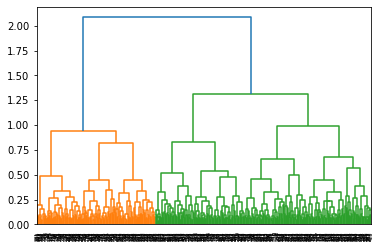

In [93]:
# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

We instantiate an agglomerative clustering cluster cluster object, then fit it to the data matrix X.

In [94]:
# Create clusters and fit
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
hc.fit(X)

AgglomerativeClustering()

Finally, we print the number of clusters automatically chosen through agglomerative clustering.

In [95]:
# Print number of clusters
hc.n_clusters_

2

Both the dendrogram and the AgglomerativeClustering() algorithm selected 2 clusters with diabetes, even though the .inertia_ using KMeans was the highest with n_clusters=2. We'll investigate this more in the next lesson on how to select the best value for k!

## Clustering analysis: choosing the optimal number of clusters

### Silhouette method

In the last lesson, we got a taste of how different numbers of clusters affects the performance of your K-Means algorithm.

In this exercise, we will be using the silhouette_score() function from sklearn.metrics on K-Means algorithms and ran on the diabetes DataFrame in order to perform the Silhouette method for finding the optimal number of clusters. Note we will be using euclidian distance when calculating the score as it ensures comparability between it and the Elbow method.

We're at the same place in the pipeline as the last few exercises, but here we'll add predicting as well: 

<img src='pipeline-08.png'/>

We import the necessary modules to instantiate a K-means algorithm and get its silhouette score.

In [96]:
# Import modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Create the target matrix X by dropping the target variable progression.

In [97]:
# Feature matrix
X = diabetes.drop("progression", axis=1)

We instantiate, fit and predict a K-Means object for each number of clusters ranging from 2 to 8 and Print the silhouette score for each iteration of clustering.


In [98]:
# For loop
for n_clusters in range(2,9):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.23698717031681765)
For n_clusters = 3, silhouette score is 0.1528105463744309)
For n_clusters = 4, silhouette score is 0.1402239572018494)
For n_clusters = 5, silhouette score is 0.1480645259853134)
For n_clusters = 6, silhouette score is 0.14542704871407025)
For n_clusters = 7, silhouette score is 0.14486995030112476)
For n_clusters = 8, silhouette score is 0.14431647953248355)


The highest silhouette score for the diabetes dataset is with n_clusters=2.

### Elbow method

In this exercise, for each k value, we will initialize a K-means model and use the inertia_ attribute to identify the sum of squared distances of samples to the nearest cluster center that, when plotted, appears to be an 'elbow' in the plot.

We have to recall in the last exercise that as the value of k increased, the value for inertia_ decreased.

First, we create an empty list named sum_of_squared_distances.

In [111]:
# Create empty list
sum_of_squared_distances = []

We instantiate and fit a K-Means object for each number of clusters ranging from 1 to 14 and append the inertia score for each iteration of K-Means to sum_of_squared_distances.


In [112]:
import warnings
warnings.filterwarnings('ignore')


In [113]:
# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

Finally, we create a plot with the number of clusters on the x-axis, and the sum of squared distances on the y-axis.

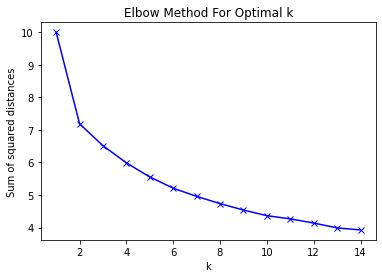

In [114]:
# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The AgglomerativeClustering(), dendrogram, silhouette score, and elbow method all agree! The best value for k with the diabetes dataset is 2! And really that makes sense if we think about it. The target variable progression, even though it is continuous, can be thought of as belonging to one of 2 groups. When compared to a previous baseline measurement, a given person's diabetes has either progressed or it hasn't!

# Step 4 : Model Selection and Evaluation

In the fourth and final step of this exercise, we'll really step it up and apply bootstrapping and cross-validation to evaluate performance for model generalization, resampling techniques to imbalanced classes, detect and remove multicollinearity, and build an ensemble model.

### Decision tree

In this exercise, we will delve into hyperparameter tuning for a decision tree on the loan_data dataset. Here we'll tune min_samples_split, which is the minimum number of samples required to create an additional binary split, and max_depth, which is how deep you want to grow the tree. The deeper a tree, the more splits and therefore captures more information about the data.

Note that we're once again performing all of the steps in the machine learning pipeline!

<img src='pipeline-06.png'/>

As usual we import the correct function for a decision tree classifier and split the data into train and test sets. Instantiate a decision tree classifier, fit, predict, and print accuracy.



In [115]:
# Import modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Instantiate, Fit, Predict
loans_clf = DecisionTreeClassifier() 
loans_clf.fit(X_train, y_train)
y_pred = loans_clf.predict(X_test)

# Evaluation metric
print("Decision Tree Accuracy: {}".format(accuracy_score(y_test,y_pred)))

 Decision Tree Accuracy: 0.5966666666666667

In [ ]:
# Import modules
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10]}

# Instantiate classifier and GridSearchCV, fit
loans_clf = DecisionTreeClassifier()
dtree_cv = GridSearchCV(loans_clf, param_grid, cv=5)
fit = dtree_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(dtree_cv.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(dtree_cv.best_score_))

 Tuned Decision Tree Parameter: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
 
 Tuned Decision Tree Accuracy: 0.7014285714285714

K-fold cross-validation improved the accuracy of a decision tree model by more than 10 percent!

### A forest of decision trees

For this exercise, we'll practice using the bootstrapped Decision Tree, otherwise known as the Random Forest. 

This time, we'll tune an additional hyperparameter, max_features, which lets our model decide how many features to use. When it is not set specifically, then it defaults to auto. Something to keep in mind for an interview is that Decision Trees consider all features by default, whereas Random Forests usually consider the square root of the number of features.


We import the correct function for a random forest classifier and split the data into train and test sets and instantiate a random forest classifier, fit, predict, and print accuracy.


In [ ]:
# Import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Instantiate, Fit, Predict
loans_rf = RandomForestClassifier() 
loans_rf.fit(X_train, y_train)
y_pred = loans_rf.predict(X_test)

# Evaluation metric
print("Random Forest Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Random Forest Accuracy: 0.69

We import the correct function to perform cross-validated grid search and perform the same steps, this time while performing cross-validated grid-search.


In [ ]:
# Import modules
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10],"max_features": [10, 20, 30]}

# Instantiate classifier and GridSearchCV, fit
loans_rf = RandomForestClassifier(n_estimators=10)
rf_cv = GridSearchCV(loans_rf, param_grid, cv=3)
fit = rf_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Accuracy: {}".format(rf_cv.best_score_))

Tuned Random Forest Parameter: {'criterion': 'gini', 'max_depth': 2, 'max_features': 30, 'min_samples_split': 10}

Tuned Random Forest Accuracy: 0.7214457772397687

Although k-fold cross-validation did not improve a random forest model as much as it did for the decision tree, it had a 7 percent improvement over the baseline!

### Model evaluation: imbalanced classification models

### Imbalanced class metrics

In this exercise we'll use sklearn to create a logistic regression model and print the confusion matrix along with several evaluation metrics to get a better understanding of how to interpret Machine Learning models from datasets that have a class imbalance.

We have to recall the class imbalance you saw previously in loan_data. The number of observations with Loan Status of Fully Paid far outweighs those that are Charged Off:

<img src='class_imbalance-01.png'/>

We import the necessary modules to create a logistic regression model as well as confusion matrix, accuracy, precision, recall, and F1-scores.

In [119]:
# Import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

Instantiate a logistic regression object, fit and predict.

In [120]:
# Instantiate, fit, predict
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Print the confusion matrix and accuracy score.

In [ ]:
# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

    Confusion matrix:
     [[  367  3868]
     [  318 10447]]
    Accuracy: 0.7209333333333333

Print the precision, recall, and F1-scores too.

In [ ]:
# Print evaluation metrics
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("F1: {}".format(f1_score(y_test, y_pred)))

    Accuracy: 0.7209333333333333
    Precision: 0.7297939224589591
    Recall: 0.9704598235020901
    F1: 0.8330940988835726

 Precision of 0.72 means there might be a high number of false positives than you really want to see. 

### Resampling techniques

In this exercise, we'll practice resampling techniques to explore the different results that alternative resampling styles can have on a dataset with class imbalance like that seen with loan_data. Using sklearn's resample() function, matching the number of rows in the majority class is called upsampling, while matching the number of rows in the minority class is called downsampling. 

We will create both an upsampled and downsampled version of the loan_data dataset, apply a logistic regression on both of them and then evaluate your performance. The training data and its labels that correspond to deny are subset to contain only the minority class and to approve that correspond to the majority. 


First, we create an upsampled minority class the length of the majority class and concatenate. Then Create a downsampled majority class the length of the minority class and concatenate.


In [ ]:
# Upsample minority and combine with majority
loans_upsampled = resample(deny, replace=True, n_samples=len(approve), random_state=123)
upsampled = pd.concat([approve, loans_upsampled])

# Downsample majority and combine with minority
loans_downsampled = resample(approve, replace = False,  n_samples = len(deny), random_state = 123)
downsampled = pd.concat([loans_downsampled, deny])

We create an upsampled feature matrix and target array. Instantiate a logistic regression model object, fit, and predict with X_test. Print the evaluation metrics.

In [ ]:
# Upsampled feature matrix and target array
X_train_up = upsampled.drop('Loan Status', axis=1)
y_train_up = upsampled['Loan Status']

# Instantiate, fit, predict
loan_lr_up = LogisticRegression(solver='liblinear')
loan_lr_up.fit(X_train_up, y_train_up)
upsampled_y_pred = loan_lr_up.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, upsampled_y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, upsampled_y_pred)))
print("Precision: {}".format(precision_score(y_test, upsampled_y_pred)))
print("Recall: {}".format(recall_score(y_test, upsampled_y_pred)))
print("F1: {}".format(f1_score(y_test, upsampled_y_pred)))

    Confusion matrix:
     [[2327 1908]
     [3672 7093]]
    Accuracy: 0.628
    Precision: 0.7880235529385624
    Recall: 0.658894565722248
    F1: 0.7176970555499341

Now we create a downsampled feature matrix and target array. Instantiate a logistic regression model object, fit, and predict with X_test. Print the evaluation metrics.


In [ ]:
# Downsampled feature matrix and target array
X_train_down = downsampled.drop('Loan Status', axis=1)
y_train_down = downsampled['Loan Status']

# Instantiate, fit, predict
loan_lr_down = LogisticRegression(solver='liblinear')
loan_lr_down.fit(X_train_down, y_train_down)
downsampled_y_pred = loan_lr_down.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, downsampled_y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, downsampled_y_pred)))
print("Precision: {}".format(precision_score(y_test, downsampled_y_pred)))
print("Recall: {}".format(recall_score(y_test, downsampled_y_pred)))
print("F1: {}".format(f1_score(y_test, downsampled_y_pred)))

    Confusion matrix:
     [[2324 1911]
     [3584 7181]]
    Accuracy: 0.6336666666666667
    Precision: 0.7898152221733392
    Recall: 0.6670692057594054
    F1: 0.7232713904416578

Using both upsampling and downsampling techniques improved the precision score significantly, meaning there are less false positives.

### Addressing multicollinearity

After careful exploratory data analysis, we realize that our baseline regression model suffers from multicollinearity. 

### Multicollinearity techniques - feature engineering

In this exercise, we'll practice creating a baseline model using Linear Regression on the diabetes dataset and explore some of the output metrics. Then we'll practice techniques to visually explore the correlation between the independent variables before finally perform feature engineering on 2 variables that are highly correlated. 

First, we instantiate, fit, and predict a Linear Regression. Print the model coefficients, MSE, and r-squared.


In [127]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [128]:
# Instantiate, fit, predict
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
y_pred = lin_mod.predict(X_test)

# Coefficient estimates
print('Coefficients: \n', lin_mod.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [  10.45384922 -261.16601105  538.84541221  280.72544466 -855.21447839
  472.17305267  166.51881384  309.88763264  684.0489522   102.37723262]
Mean squared error: 2926.80
R_squared score: 0.51


Then we create a correlation matrix, plot it to a heatmap and Print the matrix to explore the independent variable relationships.


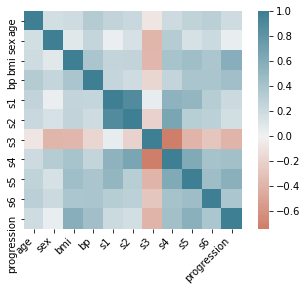

                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

In [129]:
# Correlation matrix
diab_corr = diabetes.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corr, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corr)

Now we engineer a new feature by combining s1 and s2 from diabetes, then remove them. Split our data into training and testing data with 30% test size and print the column names.


In [130]:
# Feature engineering
diabetes['s1_s2'] = diabetes['s1'] * diabetes['s2']
diabetes = diabetes.drop(['s1','s2'], axis=1)

# Print variable names
print(diabetes.columns)

# Train/test split
X2 = diabetes.drop('progression', axis=1)
y2 = diabetes['progression']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=123)

Index(['age', 'sex', 'bmi', 'bp', 's3', 's4', 's5', 's6', 'progression',
       's1_s2'],
      dtype='object')


Finally, we instantiate, fit, and predict a Linear Regression and Print the model coefficients, MSE, and r-squared.


In [131]:
# Instantiate, fit, predict
lin_mod2 = LinearRegression()
lin_mod2.fit(X_train2, y_train2)
y_pred2 = lin_mod2.predict(X_test2)

# Coefficient estimates
print('Coefficients: \n', lin_mod2.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test2, y_pred2))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test2, y_pred2))

Coefficients: 
 [  10.45384922 -261.16601105  538.84541221  280.72544466 -855.21447839
  472.17305267  166.51881384  309.88763264  684.0489522   102.37723262]
Mean squared error: 2926.80
R_squared score: 0.51


Now we know how to get metrics from your baseline model, how to explore relationships visually, and how to use feature engineering to reduce multicollinearity. We got the same R-squared score, but the MSE was slightly lower! Trying different combinations of feature engineering would likely continue to improve the model.

### Multicollinearity techniques - PCA

In the last exercise we used feature engineering to combine the s1 and s2 independent variables as s1_s2 since they displayed the highest correlation in the diabetes dataset. 

In this exercise, we'll perform PCA on diabetes to remove multicollinearity before you apply Linear Regression to it. Then, we'll compare the output metrics to those from the last exercise. Finally, we'll visualize what the correlation matrix and heatmap of the dataset looks like since PCA completely removes multicollinearity.

As usual, we import the necessary modules to perform PCA. Instantiate and fit. Transform train and test separately.


In [132]:
# Import
from sklearn.decomposition import PCA

# Instantiate
pca = PCA()

# Fit on train
pca.fit(X_train)

# Transform train and test
X_trainPCA = pca.transform(X_train)
X_testPCA = pca.transform(X_test)

Now we instantiate, fit, and predict a Linear Regression to PCA transformed dataset and Print the model coefficients, MSE, and r-squared.


In [133]:
# Import
from sklearn.linear_model import LinearRegression

# Instantiate, fit, predict
LinRegr = LinearRegression()
LinRegr.fit(X_trainPCA, y_train)
predictions = LinRegr.predict(X_testPCA)

# The coefficients
print('Coefficients: \n', LinRegr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [  431.83041038  -293.77173602   253.57573406   568.70922969
   -67.51943277  -186.26488336    71.89012557    47.21891689
    93.98511769 -1130.48023791]
Mean squared error: 2926.80
Variance score: 0.51



    Finally, we create a correlation matrix, plot it to a heatmap.
    Print the matrix to explore the independent variable relationships.


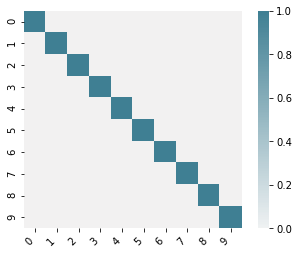

              0             1             2             3             4  \
0  1.000000e+00 -3.466536e-17  3.005816e-16  1.649939e-16 -9.521843e-16   
1 -3.466536e-17  1.000000e+00  4.660816e-16 -6.640762e-17  6.539659e-17   
2  3.005816e-16  4.660816e-16  1.000000e+00  3.340359e-16 -7.674704e-17   
3  1.649939e-16 -6.640762e-17  3.340359e-16  1.000000e+00  1.116517e-16   
4 -9.521843e-16  6.539659e-17 -7.674704e-17  1.116517e-16  1.000000e+00   
5 -5.012190e-16  2.174121e-16 -5.281937e-17  8.491655e-17  2.070404e-16   
6 -2.296643e-16  1.541340e-16 -2.923695e-16  2.137891e-17 -2.030928e-16   
7 -8.751752e-17  1.146410e-16 -1.370769e-16 -1.569098e-16  2.253787e-16   
8  4.856053e-17 -1.377656e-15  4.379280e-16 -2.167497e-16  5.781779e-16   
9  1.540120e-15 -2.083591e-18  3.294193e-16  8.558624e-16  4.131414e-16   

              5             6             7             8             9  
0 -5.012190e-16 -2.296643e-16 -8.751752e-17  4.856053e-17  1.540120e-15  
1  2.174121e-16  1.541340e

In [134]:
# Correlation matrix
X_trainPCA = pd.DataFrame(X_trainPCA)
diab_corrPCA = X_trainPCA.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corrPCA, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corrPCA)

This simple change, although it didn't improve our metrics, removed all of the multicollinearity in the diabetes dataset!

### Model selection: ensemble models

### Random forest ensemble

This last part in the exercise is to create and compare two different ensemble models for loan_data.

In this exercise, we will create a Random Forest Classifier model and compare its performance metrics to the model in the next exercise.

First, we import the modules to create a Random Forest model and create a confusion matrix, accuracy, precision, recall, and F1-scores. Then instantiate a RF classifier and set the appropriate argument to generate 50 estimators.


In [135]:
# Import
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate
rf_model = RandomForestClassifier(n_estimators=50, random_state=123, oob_score = True)

Fit the data to the instantiated Random Forest Classifier model object.

In [136]:
# Instantiate, fit
rf_model = RandomForestClassifier(n_estimators=50, random_state=123, oob_score = True)
rf_model = rf_model.fit(X_train, y_train)

Create predictions using the trained model object.

In [137]:
rf_pred = rf_model.predict(X_test)

Finally we Evaluate the model fit.

In [ ]:
# Print evaluation metrics
print("Random Forest Accuracy: {}".format(accuracy_score(y_test, rf_pred)))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, rf_pred)))
print("Precision: {}".format(precision_score(y_test, rf_pred)))
print("Recall: {}".format(recall_score(y_test, rf_pred)))
print("F1: {}".format(f1_score(y_test, rf_pred)))

    Confusion matrix:
     [[ 1923  5629]
     [ 1704 17417]]
    Precision: 0.7557493708235703
    Recall: 0.9108833220019873
    F1: 0.8260962363933881

Now we'll compare these metrics to a Gradient Boosting model in the next exercise!

### Gradient boosting ensemble

Boosting is a technique where the error of one predictor is passed as input to the next in a sequential manner. Gradient Boosting uses a gradient descent procedure to minimize the log loss for each subsequent classification tree added one at a time that, on their own, are weak decision models. Gradient Boosting for regression is similar, but uses a loss function such as mean squared error applied to gradient descent. 

In this exercise, we will create a Gradient Boosting Classifier model and compare its performance to the Random Forest from the previous exercise, which had an accuracy score of 72.5%.


    First, we import the modules to create a Gradient Boosting model and print out the confusion matrix, accuracy, precision, recall, and F1-scores.
    Then we instantiate a GB classifier and set the appropriate argument to generate 50 estimators and with a learning rate of 0.01.


In [139]:
# Import
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01,random_state=123)

Fit the data and create predictions.

In [140]:
# Instantiate, fit, predict
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

Then we evaluate the model fit by printing trained model evaluation metrics.

In [ ]:
# Print evaluation metrics
print("Gradient Boosting Accuracy: {}".format(accuracy_score(y_test, gb_pred)))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, gb_pred)))
print("Precision: {}".format(precision_score(y_test, gb_pred)))
print("Recall: {}".format(recall_score(y_test, gb_pred)))
print("F1: {}".format(f1_score(y_test, gb_pred)))

    Gradient Boosting Accuracy: 0.7162
    Confusion matrix:
     [[    0  4257]
     [    0 10743]]
    Precision: 0.7162
    Recall: 1.0
    F1: 0.834634657965272

Base on the results, the ensemble model that had the best accuracy is the Random Forest.

### **At the end of this analysis,, we've learned how to effectively deal with missing data, avoid under or overfitting, apply transformations, among many other best practices in the step-by-step process of creating the best machine learning models.**


By Santiago. A Jiménez